# Libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings(action="ignore")

# Data set

In [61]:
# get dataset
train = pd.read_csv("../data/train.csv", low_memory=False)

display(train.shape)
train.head(5)

(558211, 55)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


In [3]:
# change string dates to date type
train['ClaimStartDt'] = pd.to_datetime(train['ClaimStartDt'], format='%Y-%m-%d')
train['ClaimEndDt'] = pd.to_datetime(train['ClaimEndDt'], format='%Y-%m-%d')
train['AdmissionDt'] = pd.to_datetime(train['AdmissionDt'], format='%Y-%m-%d')
train['DischargeDt'] = pd.to_datetime(train['DischargeDt'], format='%Y-%m-%d')
train['DOB'] = pd.to_datetime(train['DOB'], format='%Y-%m-%d')

# Profiling

In [4]:
# profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)
# profile.to_widgets()

# EDA

In [5]:
inpatient = train['AdmissionDt'].notnull()
outpatient = train['AdmissionDt'].isna()

fraudulent = train['PotentialFraud'].eq('Yes')
genuine = train['PotentialFraud'].eq('No')

<b> Count the number of medical doctors in the train outpatient and inpatient dataset

In [6]:
print('Number of total medical doctors: ', 
      train['AttendingPhysician'].nunique())
print('-'*50)

print('Number of AttendingPhysician in inpatient dataset: ', 
      train[inpatient]['AttendingPhysician'].nunique())
print('Number of AttendingPhysician in outpatient dataset: ', 
      train[outpatient]['AttendingPhysician'].nunique())
print('-'*50)

print('Number of OperatingPhysician in inpatient dataset: ', 
      train[inpatient]['OperatingPhysician'].nunique())
print('Number of OperatingPhysician in outpatient dataset: ', 
      train[outpatient]['OperatingPhysician'].nunique())
print('-'*50)

print('Number of OtherPhysician in inpatient dataset: ', 
      train[inpatient]['OtherPhysician'].nunique())
print('Number of OtherPhysician in outpatient dataset: ', 
      train[outpatient]['OtherPhysician'].nunique())

Number of total medical doctors:  82063
--------------------------------------------------
Number of AttendingPhysician in inpatient dataset:  11604
Number of AttendingPhysician in outpatient dataset:  74109
--------------------------------------------------
Number of OperatingPhysician in inpatient dataset:  8287
Number of OperatingPhysician in outpatient dataset:  28532
--------------------------------------------------
Number of OtherPhysician in inpatient dataset:  2877
Number of OtherPhysician in outpatient dataset:  44388


<b>Analysing if inpatient claims with same physicians are more suitable to frauds.

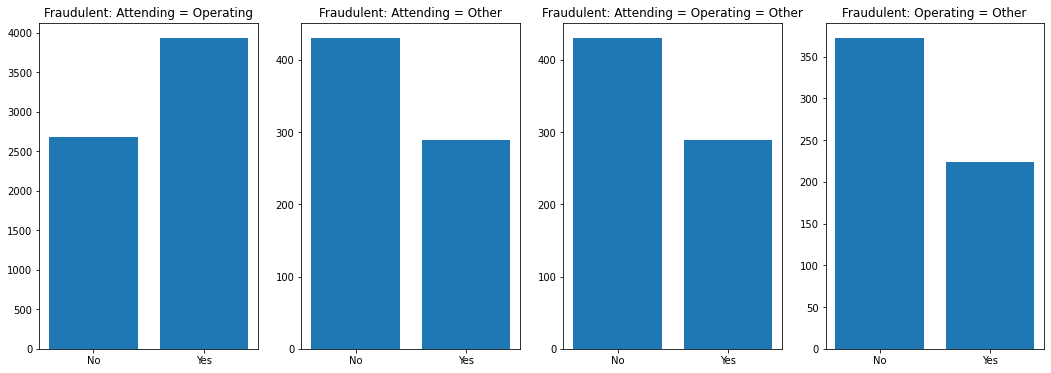

In [7]:
attendingOperating = train[inpatient][train['AttendingPhysician'] == train['OperatingPhysician']].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

attendingOther = train[inpatient][train['AttendingPhysician'] == train['OtherPhysician']].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

attendingOperatingOther = train[inpatient][(train['AttendingPhysician'] == train['OtherPhysician']) & 
                                          (train['AttendingPhysician'] == train['OtherPhysician'])].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

operatingOther = train[inpatient][train['OperatingPhysician'] == train['OtherPhysician']].groupby(
    'PotentialFraud', as_index=False)['OperatingPhysician'].count()



fig, axs = plt.subplots(1, 4, figsize=(18,6))
axs[0].bar(attendingOperating['PotentialFraud'], attendingOperating['AttendingPhysician']);
axs[0].set_title('Fraudulent: Attending = Operating')
axs[1].bar(attendingOther['PotentialFraud'], attendingOther['AttendingPhysician']);
axs[1].set_title('Fraudulent: Attending = Other')
axs[2].bar(attendingOperatingOther['PotentialFraud'], attendingOperatingOther['AttendingPhysician']);
axs[2].set_title('Fraudulent: Attending = Operating = Other')
axs[3].bar(operatingOther['PotentialFraud'], operatingOther['OperatingPhysician']);
axs[3].set_title('Fraudulent: Operating = Other');

It can be a good idea to add a feature engineering column for when the attending physician is the same as the opearting physician given that it seems to have a relation with fraud claims.

<b>Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [8]:
print('Number of chronic conditions in inpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].notnull()].filter(regex='ChronicCond').eq(2).sum()))
print('Number of chronic conditions in outpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].isna()].filter(regex='ChronicCond').eq(2).sum()))

Number of chronic conditions in inpatient dataset:  220969
Number of chronic conditions in outpatient dataset:  3408175


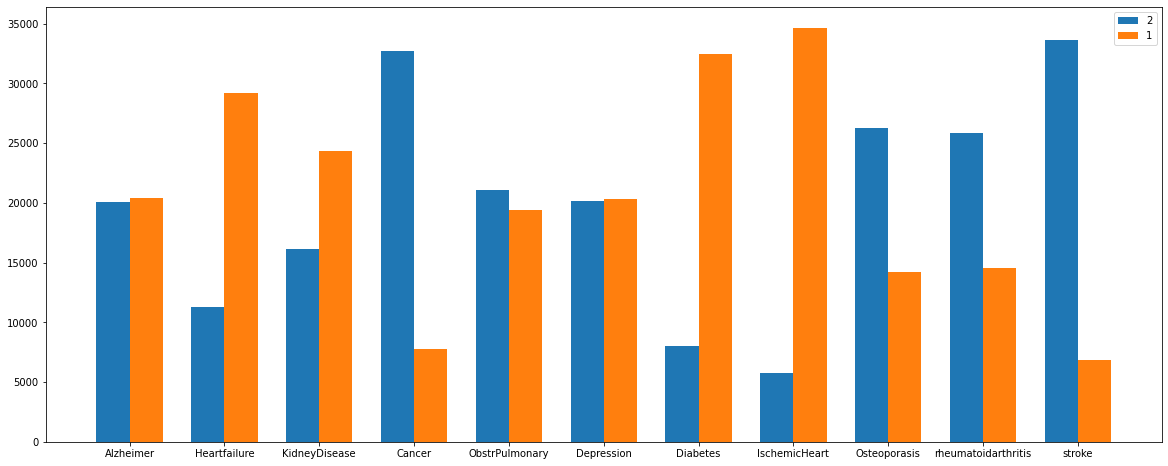

In [9]:
inpatientChronicCount = train[inpatient].filter(regex='ChronicCond').eq(2).sum().reset_index()
inpatientChronicCount['condition'] = inpatientChronicCount['index'].str.split('_').str[1]
inpatientChronicCount['one'] = len(train[inpatient]) - inpatientChronicCount[0]


# outpatientChronicCount = train[outpatient].filter(regex='ChronicCond').eq(2).sum().reset_index()
# outpatientChronicCount['condition'] = outpatientChronicCount['index'].str.split('_').str[1]


x = np.arange(len(inpatientChronicCount['condition']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, inpatientChronicCount[0], width, label='2')
rects2 = ax.bar(x + width/2, inpatientChronicCount['one'], width, label='1')
ax.set_xticks(x)
ax.set_xticklabels(list(inpatientChronicCount['condition']))
ax.legend()

plt.show()

<b>How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [10]:
print('Number of distinct BeneIDs in inpatient dataset: ', 
      train[inpatient]['BeneID'].nunique())
print('Number of distinct BeneIDs in outpatient dataset: ', 
      train[outpatient]['BeneID'].nunique())

Number of distinct BeneIDs in inpatient dataset:  31289
Number of distinct BeneIDs in outpatient dataset:  133980


<b> BeneID with the most fraud?

In [11]:
pd.DataFrame(train[fraudulent].groupby(
    ['BeneID'], as_index=False)['PotentialFraud'].count()).nlargest(10, 'PotentialFraud')

,BeneID,PotentialFraud
10812,BENE118316,28
26429,BENE143400,27
15918,BENE126421,24
6454,BENE111306,23
60830,BENE59303,23
64729,BENE66093,23
18147,BENE130030,22
48883,BENE38076,22
53425,BENE46215,22
55763,BENE50335,22


<b>Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

In [12]:
train[['AttendingPhysician','Provider']].drop_duplicates(subset=['AttendingPhysician'])['Provider'].value_counts()

PRV52019    643
PRV55215    544
PRV55510    418
PRV57173    303
PRV56268    299
           ... 
PRV53659      1
PRV53090      1
PRV52238      1
PRV55340      1
PRV52525      1
Name: Provider, Length: 5019, dtype: int64

<b>Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

In [13]:
train[['BeneID','Provider']].drop_duplicates(subset=['BeneID'])['Provider'].value_counts()

PRV55215    2580
PRV51459    2153
PRV53797    1654
PRV52649    1395
PRV53918    1340
            ... 
PRV55051       1
PRV51988       1
PRV55808       1
PRV54471       1
PRV51888       1
Name: Provider, Length: 4223, dtype: int64

Do the same providers provide both inpatient and outpatient services? Summarize your finding.

Do some of the same patients receive both inpatient and outpatient services? Summarize your finding.

------------------------------------------------

Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [14]:
# adding a column representing the age at the time of service
def f(df):
    age = relativedelta(df['ClaimStartDt'], df['DOB']) 
    return age.years

train['ageAtClaim'] = train.apply(f, axis=1)

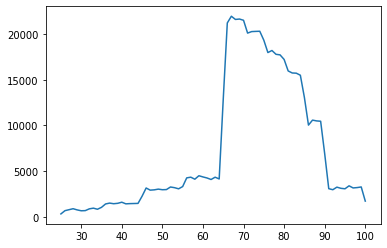

In [15]:
plt.plot(train.groupby(['ageAtClaim'])['ageAtClaim'].count());

Study the relationship between the patient age and their chronic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

In [16]:
train[['ChronicCond_Alzheimer', 'ageAtClaim']].groupby(['ageAtClaim']).count()

,ChronicCond_Alzheimer
ageAtClaim,
25,332
26,687
27,794
28,900
29,772
30,676
31,692
32,886
33,962


In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question that what types of patients would make more outpatient visits, please provide your finding.

In [17]:
train[outpatient].groupby(['BeneID'])['InscClaimAmtReimbursed'].sum()

BeneID
BENE100000     120
BENE100001    1430
BENE100002    1700
BENE100003     300
BENE100004     380
              ... 
BENE99994     1330
BENE99995      800
BENE99997     1470
BENE99998     1600
BENE99999     1000
Name: InscClaimAmtReimbursed, Length: 133980, dtype: int64

In answering what types of patients would make more inpatient service claims, please provide your findings.

In [18]:
train[inpatient].groupby(['BeneID'])['InscClaimAmtReimbursed'].sum()

BeneID
BENE100002    12000
BENE100004     3000
BENE100006    17000
BENE100007     4000
BENE100010    12000
              ...  
BENE99965      7000
BENE99974     11000
BENE99976     14000
BENE99984      3000
BENE99995     19000
Name: InscClaimAmtReimbursed, Length: 31289, dtype: int64

From the prospect of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

In [19]:
train.groupby('BeneID').agg(TotalReimbursed=('InscClaimAmtReimbursed', 'sum'), ClaimCount=('BeneID', 'count'))

,TotalReimbursed,ClaimCount
BeneID,,
BENE100000,120,2
BENE100001,1430,10
BENE100002,13700,14
BENE100003,300,1
BENE100004,3380,6
...,...,...
BENE99994,1330,7
BENE99995,19800,2
BENE99997,1470,7


From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit.

In [20]:
train.groupby('BeneID').agg(
    ClaimCount = ('BeneID', 'count'), 
    TotalReimbursed = ('InscClaimAmtReimbursed', 'sum'),
    TotalDeductiblePaid = ('DeductibleAmtPaid', 'sum'))

,ClaimCount,TotalReimbursed,TotalDeductiblePaid
BeneID,,,
BENE100000,2,120,0.0
BENE100001,10,1430,100.0
BENE100002,14,13700,1068.0
BENE100003,1,300,0.0
BENE100004,6,3380,1118.0
...,...,...,...
BENE99994,7,1330,0.0
BENE99995,2,19800,1068.0
BENE99997,7,1470,0.0


------------

Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

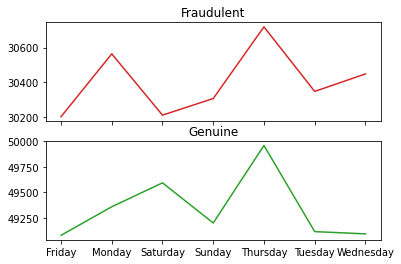

In [21]:
# create a new column representing the day of the week
train['ClaimStartDtDOW'] = train['ClaimStartDt'].dt.day_name()

fig, axs = plt.subplots(2)
axs[0].plot(train[fraudulent].groupby(['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[0].set_title('Fraudulent')
axs[1].plot(train[genuine].groupby(['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:green');
axs[1].set_title('Genuine')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Identify the top  5  most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

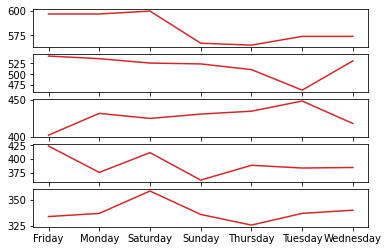

In [22]:
# top 5 most frequent ClmAdmitDiagnosisCodes
train['ClmAdmitDiagnosisCode'].value_counts().head(5)

fig, axs = plt.subplots(5)
axs[0].plot(train[train['ClmAdmitDiagnosisCode'].eq('V7612')].groupby(
    ['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[1].plot(train[train['ClmAdmitDiagnosisCode'].eq('42731')].groupby(
    ['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[2].plot(train[train['ClmAdmitDiagnosisCode'].eq('78605')].groupby(
    ['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[3].plot(train[train['ClmAdmitDiagnosisCode'].eq('4019')].groupby(
    ['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[4].plot(train[train['ClmAdmitDiagnosisCode'].eq('25000')].groupby(
    ['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

For the inpatient patients, is there any pattern between the durations of the treatments and the patient attributes?

For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.

-------

<b>Study the distributions of InscClaimAmtReimbursed, DeductibleAmtPaid for both inpatient and outpatient services. Your team might want to work with hist, scatter or sns.pairplot, distplot, etc.

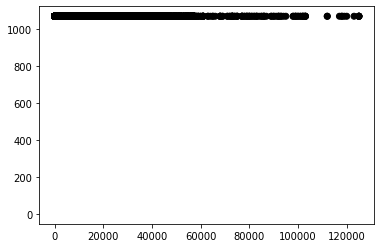

In [25]:
from matplotlib.colors import ListedColormap

train['isOutpatient'] = np.where(train['AdmissionDt'].notnull(), '0', '1')

x = train['InscClaimAmtReimbursed']
y = train['DeductibleAmtPaid']
values = train['isOutpatient']
scatter = plt.scatter(x, y,c=values)
# plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [28]:
train['DeductibleAmtPaid'].value_counts()

0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
897.0          2
876.0          2
865.0          2
886.0          1
Name: DeductibleAmtPaid, dtype: int64

<b>Study the distributions of insurance covered percentages InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid).

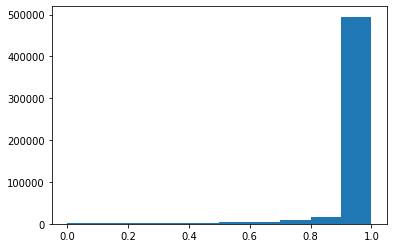

In [33]:
train['InsCovPercentage'] = train['InscClaimAmtReimbursed']/(
    train['InscClaimAmtReimbursed'] + train['DeductibleAmtPaid'])


plt.hist(train['InsCovPercentage']);

<b>Study the distributions of the durations of average insurance claims (end-start) of the providers? Box-plot/violin-plot based on the PotentialFraud flag. Do you find any differences for none-potential fraud vs potential-fraud providers?

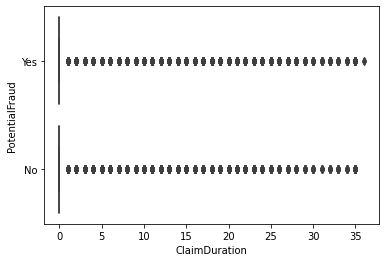

In [49]:
train['ClaimDuration'] =  (train['ClaimEndDt'] - train['ClaimStartDt']).astype('timedelta64[D]')

sns.boxplot(data = train, x = 'ClaimDuration', y = 'PotentialFraud');

<b>How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

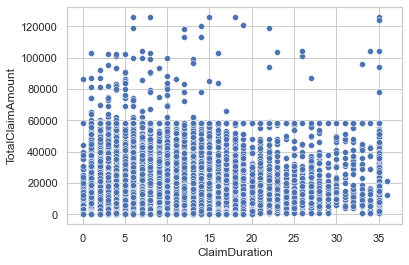

In [57]:
train['TotalClaimAmount'] = train['InscClaimAmtReimbursed'] + train['DeductibleAmtPaid']

sns.scatterplot(data = train, x='ClaimDuration', y='TotalClaimAmount');

<b>Consider mean daily total charges (i.e. total charge/duration), please describe their distribution. How do the Potential Fraud flag affect the distribution patterns?

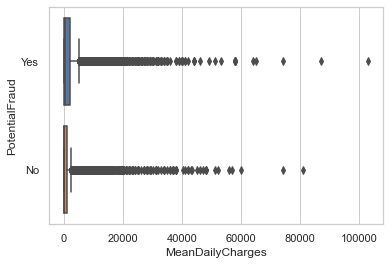

In [60]:
train['MeanDailyCharges'] = (train['TotalClaimAmount']/train['ClaimDuration']).replace([np.inf, -np.inf], np.nan)

sns.boxplot(data = train, x='MeanDailyCharges', y='PotentialFraud');

-----

<b> 
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of these duplicated records would signal potential fraud activities.
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

<b>Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [70]:
# claimID is a unique number, always: df['Student'].duplicated().any()

train['DuplicateCode'] = train[['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','Provider']].apply(
    lambda x: ''.join(x), axis=1)

train['DuplicateCode'].duplicated().any()

False

<b>Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

<b>Summarize the duplicate record counts/provider and study if the statistics have different distributions between honest and potentialfraud providers.

<b>Do these potentially fraud providers reuse doctor IDs and/or patient IDs? If so, these fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to the other types of fraudulent activities.

<b>Do these duplicated records show any anomaly in terms of geographic locations? Even though the original data doesn't specify the providers nor the doctors' practice locations, one may use the majority of the patients' residence state/county information to infer their physical locations.

<b>Base on your best knowledge of suspicious activities in duplicating the patient claims, flag the providers accordingly. Compare with the PotentialFraud flags offered by the dataset and discuss.